In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

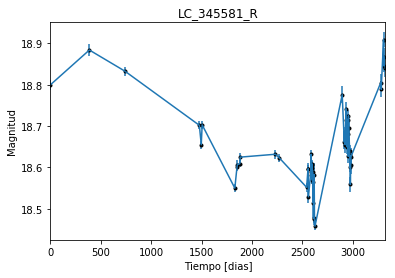

In [2]:
data = np.genfromtxt('LC_345581_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_345581_R')
plt.savefig("LC_345581_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

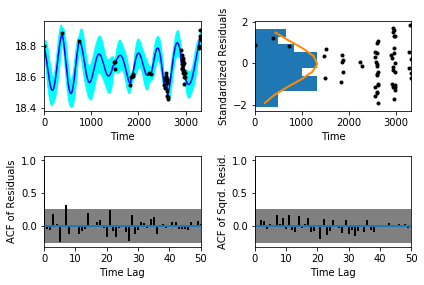

In [5]:
sample.assess_fit()

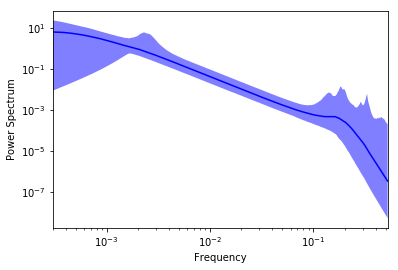

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

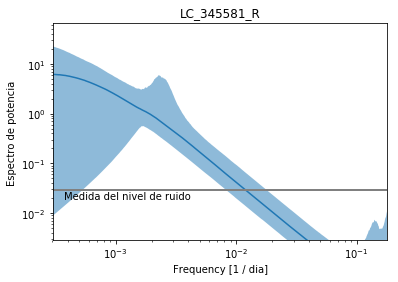

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_345581_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_345581_R')

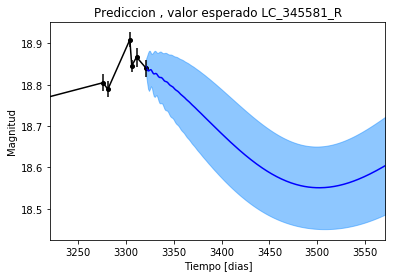

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_345581_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_345581_R')

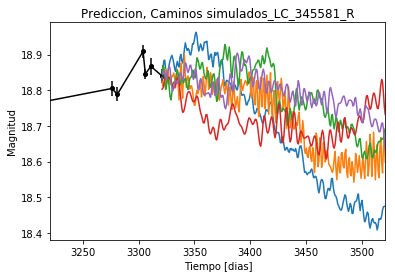

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_345581_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


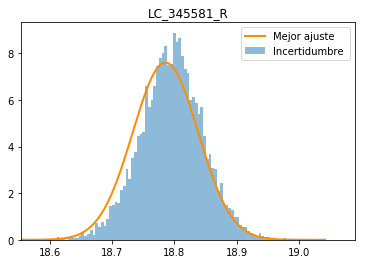

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_345581_R')
plt.savefig("Mejor_ajuste_LC_345581_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_345581_R')

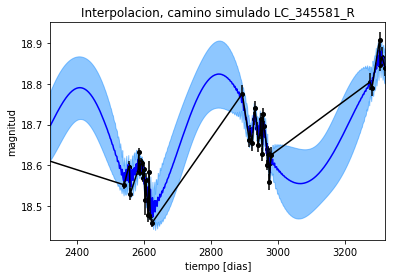

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_R')

Text(0.5,1,'Interpolacion, camino simulado LC_345581_R')

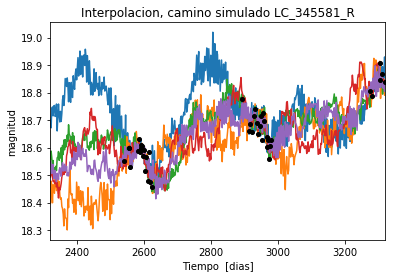

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 828.167298302
Median: 0.0128755291431
Standard deviation: 0.0660647527993
68% credibility interval: [ 0.00536782  0.0320099 ]
95% credibility interval: [ 0.00149871  0.14187953]
99% credibility interval: [ 0.00069645  0.54619123]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 657.27141017
Median: 0.0128340484565
Standard deviation: 0.0595932524718
68% credibility interval: [ 0.00534594  0.03181332]
95% credibility interval: [ 0.00146672  0.13399789]
99% credibility interval: [ 0.00069645  0.43735867]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1719.80862702
Median: 0.304752524225
Standard deviation: 0.307619671422
68% cr

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 563.449728161
Median: 109.244385631
Standard deviation: 2.11886492427
68% credibility interval: [ 106.83136202  110.97155111]
95% credibility interval: [ 104.12809105  112.19714148]
99% credibility interval: [ 101.94904326  112.88542764]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 937.301012497
Median: 2.15854378814
Standard deviation: 2.07158648349
68% credibility interval: [ 0.39942789  4.98095825]
95% credibility interval: [ 0.11753015  6.63366685]
99% credibility interval: [ 0.06005282  9.28148221]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 370.653519737
Median: 2.59851131509
Standard deviation: 10.3792526623
68% credibility interval: [  1.40896668  18.92556694]
95% credibility interval: [  0.81163636  3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15426.1768324
Median: 1.30238936375e-35
Standard deviation: 7.16029570462e+80
68% credibility interval: [  5.32630357e-101   1.18995862e+011]
95% credibility interval: [  1.81379633e-199   2.05872827e+056]
99% credibility interval: [  6.01769724e-206   2.86002425e+078]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1114.45330531
Median: 18.7126360557
Standard deviation: 0.0593699084693
68% credibility interval: [ 18.66520541  18.77192257]
95% credibility interval: [ 18.60643996  18.84872799]
99% credibility interval: [ 18.55178325  18.90049761]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 329.758008731
Median: 0.21312976841
Standard deviation: 0.237562781658
68% credibility interval: [ 0.17188311  0.66724955]
95% credibility interval: [ 0.13053929  0.88076834]
99% credibility interval: [ 0.10720226  1.00178614]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 329.758008731
Median: 0.21312976841
Standard deviation: 0.237562781658
68% credibility interval: [ 0.17188311  0.66724955]
95% credibility interval: [ 0.13053929  0.88076834]
99% credibility interval: [ 0.10720226  1.00178614]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 124.661435249
Median: 0.0
Standard deviation: 0.000756406847087
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 563.449728161
Median: 109.244385631
Standard deviation: 2.11886492427
68% credibility interval: [ 106.83136202  110.97155111]
95% credibility interval: [ 104.12809105  112.19714148]
99% credibility interval: [ 101.94904326  112.88542764]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 971.324903024
Median: 0.0183847556995
Standard deviation: 0.00978943768004
68% credibility interval: [ 0.01199783  0.0292332 ]
95% credibility interval: [ 0.00844843  0.04571324]
99% credibility interval: [ 0.00711469  0.05949986]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1658.58406928
Median: 1.1888440809
Standard deviation: 0.269826709507
68% credibility interval: [ 0.95855585  1.50454213]
95% credibility interval: [ 0.78042874  1.83999414]
99% credibility interval: [ 0.69800735  1.95316344]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 295.397855078
Median: 0.0432445435581
Standard deviation: 0.46031012069
68% credibility interval: [  4.19591363e-13   2.78507960e-01]
95% credibility interval: [  1.94852707e-58   1.73172751e+00]
99% credibility interval: [  1.22486546e-80   2.69005630e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 828.167298302
Median: (-0.080899335534-2.81965339656j)
Standard deviation: 1.54929420546
68% credibility interval: [-0.20112414-2.30589907j -0.03372698-5.56122047j]
95% credibility interval: [-0.89145541-3.41927673j -0.00941670-1.81507593j]
99% credibility interval: [-3.43182068-4.47292184j -0.00437595-6.33214948j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 657.27141017
Median: (-0.0806387046938+1.3145188912j)
Standard deviation: 1.53889858367
68% credibility interval: [-0.19988901+1.27813473j -0.03358950+0.90773786j]
95% credibility interval: [-0.84193357+3.11575502j -0.00921570+1.26336071j]
99% credibility interval: [-2.74800554+3.04508598j -0.00437595+6.33214948j]
Posterior summary for parameter ar_roots  eleme